<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Ecuaci%C3%B3n_de_Calor_con_dif_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy as sp
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from tabulate import tabulate

In [ ]:
def f(x):
 return np.sin(np.pi*x)

In [ ]:
def tridiagonal(n,a,b):
    return sp.Matrix([
    [a if i == j else b if abs(i-j) == 1 else 0 for j in range(n)]
    for i in range(n)
])

Codificar la Matriz de A de manera simple

In [ ]:
r=1

In [ ]:
A= tridiagonal(9, 2-2*r, r)

In [ ]:
A

Matrix([
[0, 1, 0, 0, 0, 0, 0, 0, 0],
[1, 0, 1, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 1, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 1, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 1, 0, 0, 0],
[0, 0, 0, 0, 1, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 1, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 1, 0, 1],
[0, 0, 0, 0, 0, 0, 0, 1, 0]])

In [ ]:
b=sp.Matrix([f(0.1),f(0.2),f(0.3),f(0.4),f(0.5),f(0.6),f(0.7),f(0.8),f(0.9)])

Definir las entradas de b con un bucle

In [ ]:
u0=sp.Matrix([f(0.1*(i+1)) for i in range (9)])

In [ ]:
u1=u0

In [ ]:
def onda(A,u0,u1,j):
    u0=sp.Matrix(u0)
    u1=sp.Matrix(u1)

    S=[u0,u1]

    for n in range (2,j):
        sol= A * S[n-1] - S[n-2]
        S.append(sol)

    return sp.Matrix([s.T for s in S])

In [ ]:
j=50

In [ ]:
U=onda(A,u0,u1,j)

In [ ]:
U_np = np.array(U.tolist(), dtype=float)

Graficar y comprar con la solución exacta para un valor de j

In [ ]:
x = np.linspace(0, 1, 9)   # Número de nodos internos en X
y = np.linspace(0, 0.5, j)   # Debe coincidir con el tamaño
X, Y = np.meshgrid(x, y)

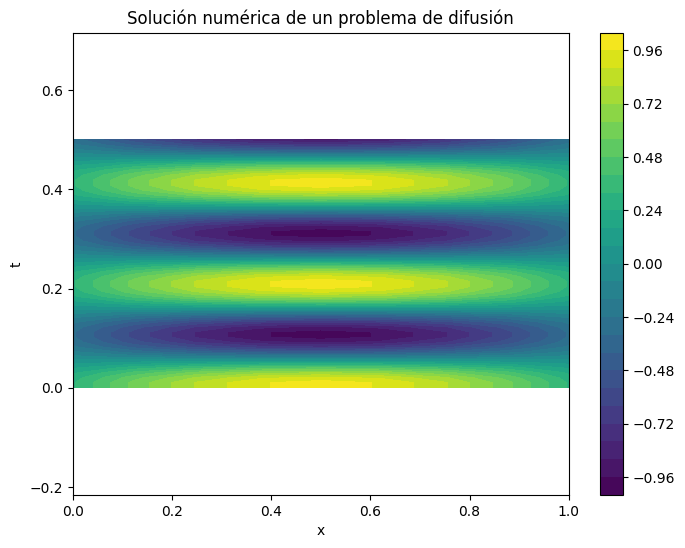

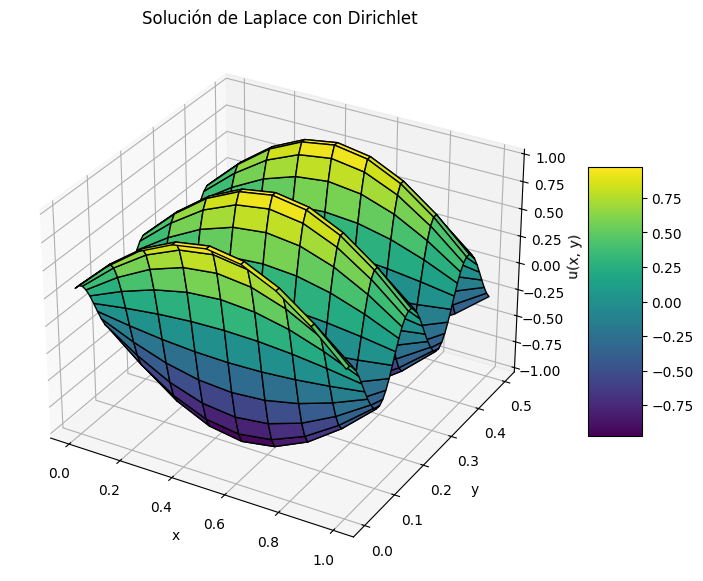

In [ ]:
# Mapa de colores
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, U_np, levels=25, cmap=cm.viridis)
plt.colorbar(contour)
plt.title('Solución numérica de un problema de difusión')
plt.xlabel('x')
plt.ylabel('t')
plt.axis('equal')
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, U_np, cmap=cm.viridis, edgecolor='k')
ax.set_title('Solución de Laplace con Dirichlet')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [70]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(8,5))
line, = ax.plot(x, U_np[0], lw=2)
ax.set_ylim(np.min(U_np), np.max(U_np))
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Evolución en el tiempo')

def update(k):
    line.set_ydata(U[k])
    ax.set_title(f'tiempo = {y[k]:.3f}')
    return line,

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

<IPython.core.display.Javascript object>

In [69]:
from matplotlib.animation import FuncAnimation
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

def update(k):
    ax.clear()
    ax.plot_surface(X, Y, U_np, cmap=cm.viridis)   # superficie completa
    ax.plot(x, y[k]*np.ones_like(x), U[k], color='r', lw=3)  # curva que se mueve
    ax.set_xlabel('x')
    ax.set_ylabel('t')
    ax.set_zlabel('u')
    ax.set_title(f"Iteración / Tiempo: {k}")
    return []

anim = FuncAnimation(fig, update, frames=len(y), interval=200)
plt.show()

<IPython.core.display.Javascript object>